# Imports and Boilerplate

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from jump_detection.processor import TimeSeriesProcessor
from jump_detection.utils import *
from jump_detection.plotting import *

# Initialization


In [4]:
# Define a window size for the moving Fstat
window_size = 150
gap_size = 10


# Step 1: Identify all jumps

In [5]:
processor = TimeSeriesProcessor(window_size, gap_size)
processor.load_data("13_4_decay_exp_data.csv")
processor.data = processor.data[0:1000000,1:]
# processor.data = processor.data[:,1:]

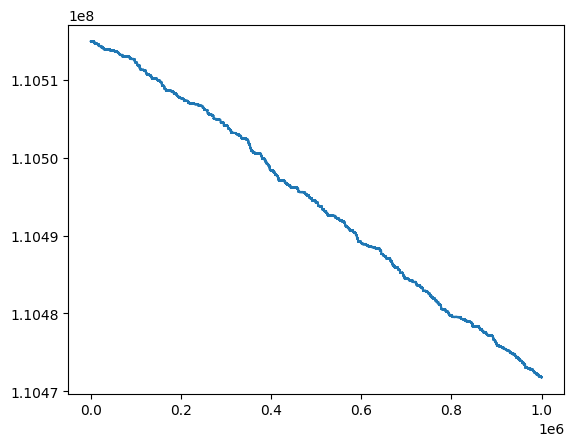

In [6]:
plt.plot(processor.data[:,1])
plt.show()

In [7]:
segments = processor.process_data()


/Users/alfredo/Desktop/redo/jump-detection/jump_detection/utils.py:167: RuntimeWarning: invalid value encountered in divide
  m_1 = np.trapz(tvect_i * data / f_int_0, dx=1.0)  # mean


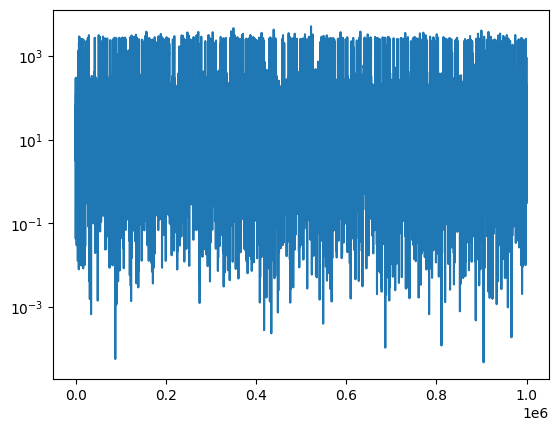

In [8]:
plt.plot(processor.moving_fstats)
plt.yscale('log')
# plt.ylim((0,10))

In [9]:
print(r"A total of %s jumps were found: "%len(processor.segments))


A total of 964 jumps were found: 


# Step 2: Reduce to single-event jumps

## Operating on individual segments

In [10]:
segment = processor.segments[5]

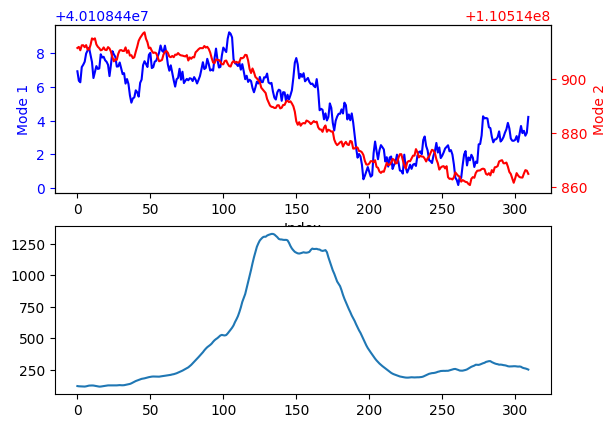

In [12]:
plot_segment(segment)

In [13]:
segment.features

(78,
 148.49789434636142,
 1038.3781129887907,
 1.1881042227115177,
 7.155172421648245)

In [14]:
segment.calculate_freq_shift(window_size)
print(segment.diff)

[-1.06094393e-07 -3.27418389e-07]


## Getting all features

In [15]:
jump_features = processor.get_all_features()


In [16]:
jump_features

array([[0.13468013, 0.45725605, 0.0150034 , 0.50966068, 0.00980973],
       [0.22222222, 0.62911242, 0.09549158, 0.53276851, 0.00703814],
       [0.22222222, 0.52830877, 0.08129246, 0.53438856, 0.00651364],
       ...,
       [0.23569024, 0.48677896, 0.23533698, 0.50303055, 0.0185077 ],
       [0.23569024, 0.41701071, 0.15179462, 0.52774281, 0.01009975],
       [0.23569024, 0.4076578 , 0.14230334, 0.53042679, 0.0092399 ]])

## Plotting Feature Space and Eps Determination

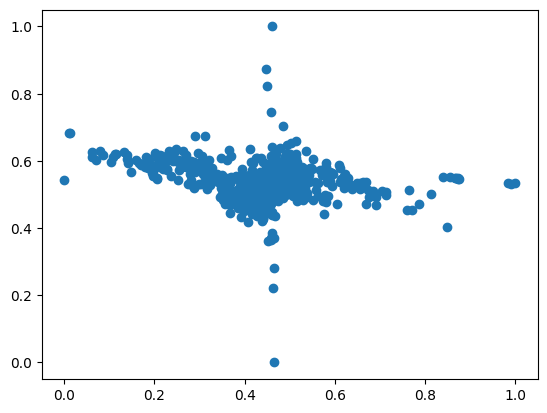

In [17]:
plt.scatter(jump_features[:,1],jump_features[:,3])

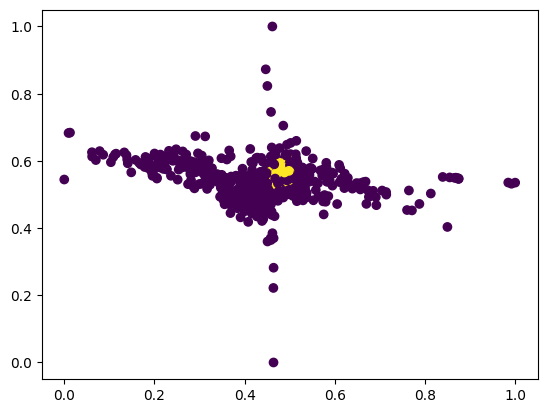

In [24]:
eps = get_eps(jump_features)
labels = get_class_labels(jump_features, eps/10)
plt.scatter(jump_features[:,1],jump_features[:,3], c = labels)

# Step 3

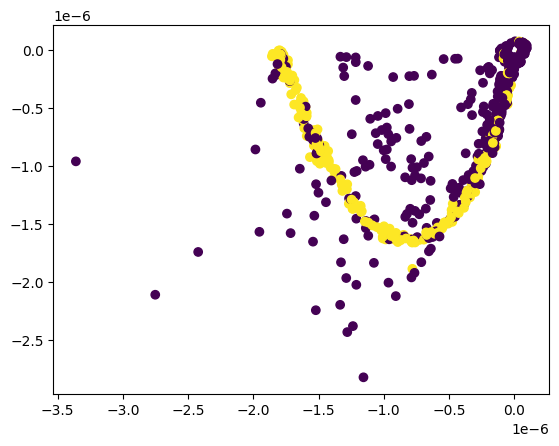

In [25]:
diffs = processor.get_all_diffs()
plt.scatter(diffs[:,0],diffs[:,1], c = labels)

In [20]:
median_jump = calculate_median_jump(processor.segments, labels)

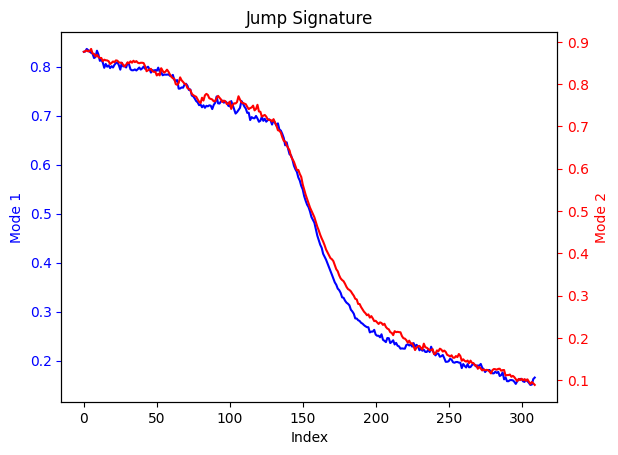

In [21]:
plot_jump_signature(processor.segments, labels)